## **Оглавление:**
- [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section1)<a class='anchor' id='id-section40'/>
- [Вывод](#id-section2)<a class='anchor' id='id-section41'/>


- [Шаг 2. Подготовим данные к анализу](#id-section3)<a class='anchor' id='id-section42'/>
- [Переименуем столбцы](#id-section4)<a class='anchor' id='id-section43'/>
- [Приведем данные к нужному типу](#id-section5)<a class='anchor' id='id-section44'/>
- [Обработаем дубликаты](#id-section6)<a class='anchor' id='id-section45'/>
- [Вывод](#id-section7)<a class='anchor' id='id-section46'/>


- [Шаг 3. Приоритизируем гипотезы](#id-section8)<a class='anchor' id='id-section47'/>
- [Применим фреймворк ICE](#id-section9)<a class='anchor' id='id-section48'/>
- [Применим фреймворк RICE](#id-section10)<a class='anchor' id='id-section49'/>
- [Вывод](#id-section11)<a class='anchor' id='id-section50'/>


- [Шаг 4. Проанализируем A/B-тест](#id-section12)<a class='anchor' id='id-section51'/>
- [Построим график кумулятивной выручки по группам](#id-section13)<a class='anchor' id='id-section52'/>
- [Вывод](#id-section14)<a class='anchor' id='id-section53'/>
- [Построим график кумулятивного среднего чека по группам](#id-section15)<a class='anchor' id='id-section54'/>
- [Вывод](#id-section16)<a class='anchor' id='id-section55'/>
- [Построим график относительного изменения кумулятивного среднего чека группы B к группе A](#id-section17)<a class='anchor' id='id-section56'/>
- [Вывод](#id-section18)<a class='anchor' id='id-section57'/>
- [Построим график кумулятивной конверсии по группам](#id-section19)<a class='anchor' id='id-section58'/>
- [Вывод](#id-section20)<a class='anchor' id='id-section59'/>
- [Построим график относительного изменения кумулятивной конверсии группы B к группе A](#id-section21)<a class='anchor' id='id-section60'/>
- [Вывод](#id-section22)<a class='anchor' id='id-section61'/>
- [Построим точечный график количества заказов по пользователям](#id-section23)<a class='anchor' id='id-section62'/>
- [Вывод](#id-section24)<a class='anchor' id='id-section63'/>
- [Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей](#id-section25)<a class='anchor' id='id-section64'/>
- [Вывод](#id-section26)<a class='anchor' id='id-section65'/>
- [Построим точечный график стоимостей заказов](#id-section27)<a class='anchor' id='id-section66'/>
- [Вывод](#id-section28)<a class='anchor' id='id-section67'/>
- [Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов](#id-section29)<a class='anchor' id='id-section68'/>
- [Вывод](#id-section30)<a class='anchor' id='id-section69'/>
- [Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным](#id-section31)<a class='anchor' id='id-section70'/>
- [Вывод](#id-section32)<a class='anchor' id='id-section71'/>
- [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным](#id-section33)<a class='anchor' id='id-section72'/>
- [Вывод](#id-section34)<a class='anchor' id='id-section73'/>
- [Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным](#id-section35)<a class='anchor' id='id-section74'/>
- [Вывод](#id-section36)<a class='anchor' id='id-section75'/>
- [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным](#id-section37)<a class='anchor' id='id-section76'/>
- [Вывод](#id-section38)<a class='anchor' id='id-section77'/>


- [Шаг 5. Общий вывод](#id-section39)<a class='anchor' id='id-section78'/>

<a class='anchor' id='id-section1'/>

## [Шаг 1. Откроем файлы с данными и изучим общую информацию](#id-section40)

Импортируем необходимые библиотеки.

Для вывода данных методы `head()` и `tail()` применять не будем, потому что Jupyter и так выведет на экран первые и последние 5 строк из длинных таблиц.

Также сразу посмотрим, какие типы данных хранятся в таблицах, воспользуемся методом `info()`.

In [191]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

tables = [hypothesis, orders, visitors]
for table in tables:
    display(table)
    table.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


<a class='anchor' id='id-section2'/>

### [Вывод](#id-section41)

Таблица `orders` - это самый большой массив данных, в нем хранится 1197 строк. Пропущенных значений в таблице нет. Категориальные переменные `transactionId`, `visitorId`, `group` имеют типы данных `int64` и `object`, а количественная переменная `revenue` с типом данных `int64` - это корректно. Переменная `date` должна иметь тип данных `datetime`, а не `object`.

В таблице `visitors` хранится 62 строки. Пропущенных значений нет. Количественная переменная `visitors` с типом данных `int64`, категориальная переменная `group` с типом данных `object` - корректно. Переменная `date` должна иметь тип данных `datetime`, а не `object`.

В таблице `hypothesis` 9 строк. Пропущенных значений нет. Все переменные имеют корретные типы данных. Однако мы заметили, что названия столбцов у этой таблицы начинаются с заглавных букв, обращаться к таким переменным будет не очень удобно. Имеет смысл сделать все названия со строчными буквами. 

<a class='anchor' id='id-section3'/>

## [Шаг 2. Подготовим данные к анализу](#id-section42)

<a class='anchor' id='id-section4'/>

### [Переименуем столбцы](#id-section43)

Методом `lower()` преобразуем заглавные буквы в названиях на строчные. + Выполним проверку.

In [192]:
hypothesis.columns = [col.lower() for col in hypothesis.columns]

display(hypothesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

<a class='anchor' id='id-section5'/>

### [Приведем данные к нужному типу](#id-section44)

В двух таблицах есть переменные, обозначающие дату. У них должен быть тип данных `datetime`. Напишем функцию, которая методом `map()` переведет столбец в нужный формат через `lambda`. Затем выпишем отдельно таблицы и столбцы, которые надо обработать, и для каждого элемента из списка применим функцию. + Выполним проверку. 

In [193]:
def datetime(df, column):
    df[column] = df[column].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
    
tables_columns = [[orders, 'date'], [visitors, 'date']]    

for table in tables_columns:
    datetime(table[0], table[1])
    table[0].info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


<a class='anchor' id='id-section6'/>

### [Обработаем дубликаты](#id-section45)

На всякий случай поищем дубликаты в таблицах методом `duplicated().sum()`, что позволит нам посчитать общее количество дубликатов. Таблицы переберем в цикле из переменной `tables`, которую мы объявили на **Шаге 1**.

In [194]:
for table in tables:
    display(table.duplicated().sum())

0

0

0

<a class='anchor' id='id-section7'/>

### [Вывод](#id-section46)

На данном этапе мы:
- убрали из названий столбцов в таблице с гипотезами заглавные буквы;
- перевели переменные, обозначающие дату, к типу `datetime`;
- убедились, что дубликаты в таблицах отсутствуют.

<a class='anchor' id='id-section8'/>

## [Шаг 3. Приоритизируем гипотезы](#id-section47)

<a class='anchor' id='id-section9'/>

### [Применим фреймворк ICE](#id-section48)

Создадим в таблице `hypothesis` столбец `ice`, в котором для каждой гипотезы мы найдем произведение параметров `impact` и `confidence` и поделим его на `efforts`. 

Отсортируем гипотезы по столбцу `ice` по убыванию приоритета и выведем на график.

<a class='anchor' id='id-section10'/>

### [Применим фреймворк RICE](#id-section49)

Создадим в таблице `hypothesis` столбец `rice`, в котором для каждой гипотезы мы найдем произведение параметров `reach`, `impact` и `confidence` и поделим его на `efforts`. 

Отсортируем гипотезы по столбцу `rice` по убыванию приоритета и выведем на график.

Автоматизируем построение графиков и вывод таблиц.

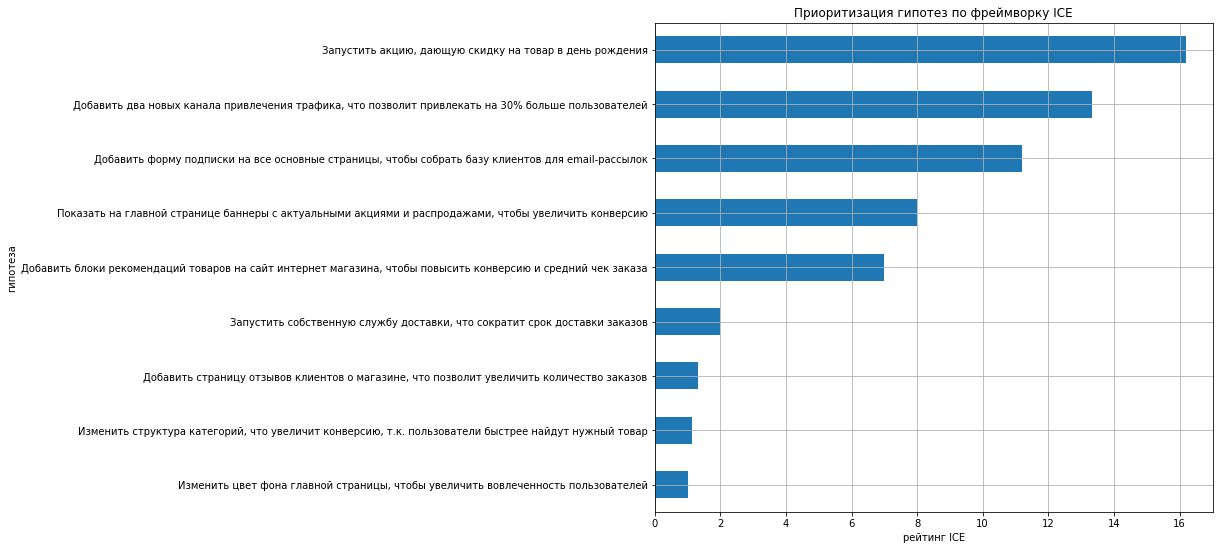

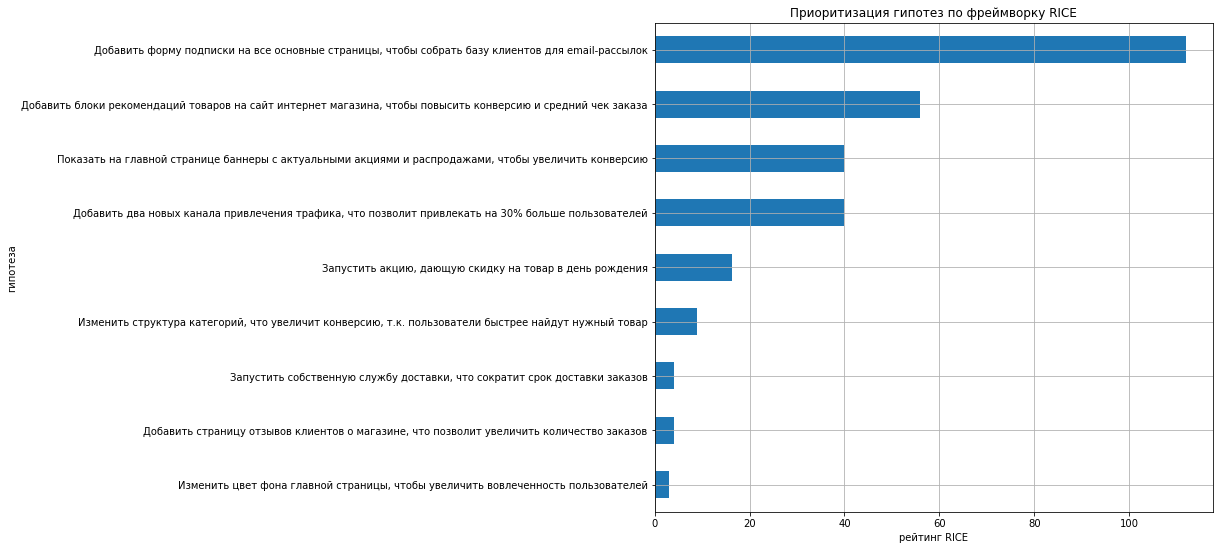

In [195]:
parameters = [
    {
     'column': 'ice',
     'title': 'Приоритизация гипотез по фреймворку ICE',
     'xlabel': 'рейтинг ICE',
     'ylabel': 'гипотеза'
    },
    {
     'column': 'rice',
     'title': 'Приоритизация гипотез по фреймворку RICE',
     'xlabel': 'рейтинг RICE',
     'ylabel': 'гипотеза'         
    }
]

def ice_rice(parameter):
    hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
    hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
    
    ax = hypothesis.groupby('hypothesis')[parameter.get('column')].sum().sort_values().plot(kind = 'barh', title = \
    parameter.get('title'), grid = True, figsize = (10, 9))
    ax.set_xlabel(parameter.get('xlabel'))
    ax.set_ylabel(parameter.get('ylabel'))
    plt.show()
    
for parameter in parameters:
    ice_rice(parameter)

<a class='anchor' id='id-section11'/>

### [Вывод](#id-section50)

Мы можем сказать, что параметры для формул были оценены точно, так как разные методики показали похожий рейтинг для гипотез (если разделить их на 2 общие группы: самых высоко и низко оцененных). 

Но если всматриваться на место каждой отдельной гипотезы в рейтинге, то всплывают **различия в оценках по ICE и RICE**.

**Согласно фреймворку ICE, самыми приоритетными гипотезами являются**:
1. запуск акции на скидку на товар в день рождения,
2. добавление 2 новых каналов привлечения трафика,
3. добавление формы подписки на все основные страницы,
4. показ на главной странице баннеров с акциями.

**Согласно фреймворку RICE, самые приоритетные гипотезы**:
1. добавление формы подписки на все основные страницы (по ICE на 3 месте),
2. добавление блоков рекомендаций товаров на сайт (по ICE на 5 месте), 
3. показ на главной странице баннеров с акциями (по ICE на 4 месте),
4. добавление 2 новых каналов привлечения трафика (по ICE на 2 месте).

Отдельно отметим, что гипотеза о запуске акции на скидку на товар в день рождения опустилась с 1 места (по ICE) на 5 место (по RICE). 

**Самые низкооцененные гипотезы и по ICE, и по RICE** одни и те же:
- изменение цвета фона главной страницы,
- добавление страницы отзывов от клиентов,
- запуск службы доставки,
- изменение структуры категорий товаров.

Таким образом, при расчете RICE оказалось, что гипотезы, у которых параметр **reach больше**, чем у остальных (то есть изменение, которое мы хотим внести, затронет большое количество пользователей), обгоняют остальные гипотезы. По этой причине гипотеза о запуске акции на скидку на товар в день рождения опустилась в рейтинге.

Следовательно, при оценке по фреймворку RICE кроме силы гипотезы (impact) наибольшее влияние имеет то, сколько пользователей затронет изменение (reach).

<a class='anchor' id='id-section12'/>

## [Шаг 4. Проанализируем A/B-тест](#id-section51)

<a class='anchor' id='id-section13'/>

### [Построим график кумулятивной выручки по группам](#id-section52)

Чтобы построить график, соберем кумулятивные данные в датафрейме `cumulativeData` со столбцами:
- `date` — дата;
- `group` — группа A/B-теста (A или B);
- `orders` — кумулятивное количество заказов на указанную дату в указанной группе;
- `buyers` — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
- `revenue` — кумулятивная выручка на указанную дату в указанной группе (средний чек);
- `visitors` — кумулятивное количество посетителей интернет-магазина на указанную дату в определенной группе.

Создадим массив уникальных пар значений дат и групп теста методом `drop_duplicates()`.

In [196]:
datesGroups = orders[['date','group']].drop_duplicates()

Соберем агрегированные кумулятивные по дням данные о заказах в таблицу `ordersAggregated`. 

Методом `np.logical_and()` получим строки таблицы `orders`, дата которых меньше или равна дате элемента из `datesGroups`, а группа теста равна группе из `datesGroups`. 

Затем агрегируем значения методом `agg()`. Вычислим максимальную дату. Для группы тоже рассчитаем максимум (чтобы столбец `group` не пропал из итогового вывода). Найдем число уникальных ID заказов и пользователей методом `pd.Series.nunique`. Подсчитаем сумму средних чеков.
 
Применим методы к каждой строке датафрейма методом `apply(axis=1)` и отсортируем результаты по столбцам `date` и `group`.

In [197]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], \
                                                                     orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, \
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина из таблицы `visitors`.

In [198]:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], \
                            visitors['group'] == x['group'])]\
                .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), \
                                       axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одну методом `merge()` с понятными названиями столбцов.

In [199]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Построим график кумулятивной выручки по дням и группам A/B-тестирования методом `plot()`.

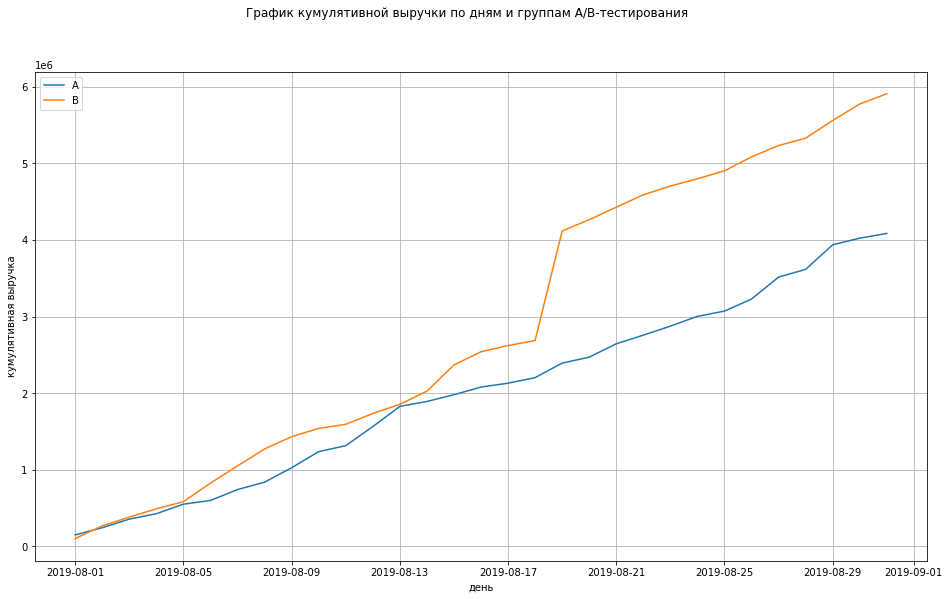

In [200]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.rcParams["figure.figsize"] = (10,5)
plt.suptitle('График кумулятивной выручки по дням и группам A/B-тестирования')
plt.legend() 
plt.grid()
plt.xlabel('день')
plt.ylabel('кумулятивная выручка')
plt.show()

<a class='anchor' id='id-section14'/>

### [Вывод](#id-section53)

В начале теста выручка увеличивалась почти равномерно. 

Однако график выручки группы В в точке за 18 августа резко вырос. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

<a class='anchor' id='id-section15'/>

### [Построим график кумулятивного среднего чека по группам](#id-section54)

Разделим кумулятивную выручку на кумулятивное число заказов.

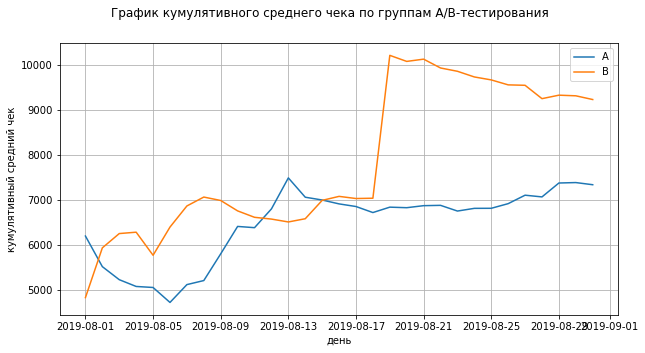

In [201]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label = 'A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label = 'B')

plt.rcParams["figure.figsize"] = (10,5)
plt.suptitle('График кумулятивного среднего чека по группам A/B-тестирования')
plt.legend() 
plt.grid()
plt.xlabel('день')
plt.ylabel('кумулятивный средний чек')
plt.show()

<a class='anchor' id='id-section16'/>

### [Вывод](#id-section55)

Ближе к концу теста средний чек немного увеличивается для группы A и падает для группы B. 

Вероятно, в группу А в первой половине теста и в группу В во сторой половине теста попали крупные заказы (резкие всплески на графике). Таким образом, этим двум группам нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

<a class='anchor' id='id-section17'/>

### [Построим график относительного изменения кумулятивного среднего чека группы B к группе A](#id-section56)

Сначала объединим данные из таблиц `cumulativeRevenueA` и `cumulativeRevenueB` в один датафрейм `mergedCumulativeRevenue` методом `merge()`. Затем посчитаем соотношение средних чеков для групп А и В. 

Для наглядности добавим на график горизонтальную ось методом `axhline()`, чтобы она соответствовала нулю по оси Х.

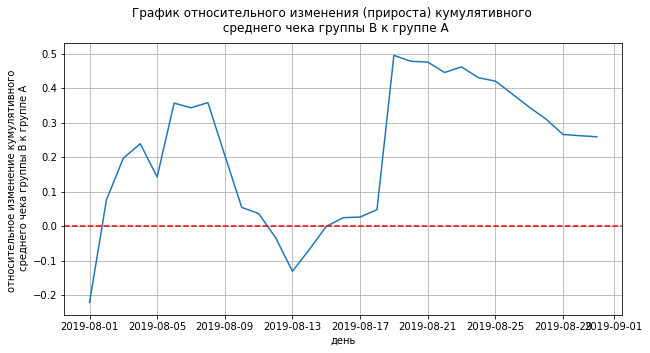

In [202]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', \
                                                   how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.axhline(y=0, color='red', linestyle='--')

plt.rcParams["figure.figsize"] = (10,5)
plt.suptitle('График относительного изменения (прироста) кумулятивного \n среднего чека группы B к группе A') 
plt.grid()
plt.xlabel('день')
plt.ylabel('относительное изменение кумулятивного \n среднего чека группы B к группе A')
plt.show()

<a class='anchor' id='id-section18'/>

### [Вывод](#id-section57)

В нескольких точках график различия между сегментами резко скачет. 

Следовательно, в данных присутствуют крупные заказы и выбросы.

<a class='anchor' id='id-section19'/>

### [Построим график кумулятивной конверсии по группам](#id-section58)

Сначала посчитаем кумулятивную конверсию в таблице `cumulativeData`. Затем отделим данные по группам А и В и построим график.

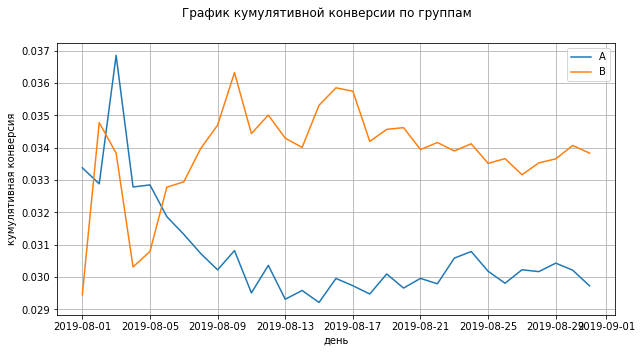

In [203]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B')

plt.rcParams["figure.figsize"] = (10,5)
plt.suptitle('График кумулятивной конверсии по группам') 
plt.grid()
plt.legend()
plt.xlabel('день')
plt.ylabel('кумулятивная конверсия')
plt.show()

<a class='anchor' id='id-section20'/>

### [Вывод](#id-section59)

У обеих групп наблюдались всплески, после которых каждая из них изменила свою тенденцию. 

Конверсия группы В вырвалась вперед и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

<a class='anchor' id='id-section21'/>

### [Построим график относительного изменения кумулятивной конверсии группы B к группе A](#id-section60)

Сначала объединим данные из таблиц `cumulativeDataA` и `cumulativeDataB` в один датафрейм `mergedCumulativeConversions` методом `merge()`. Затем посчитаем соотношение кумулятивной конверсии группы B к группе A. 

Для наглядности добавим на график горизонтальную ось методом `axhline()`, чтобы она соответствовала нулю по оси Х.

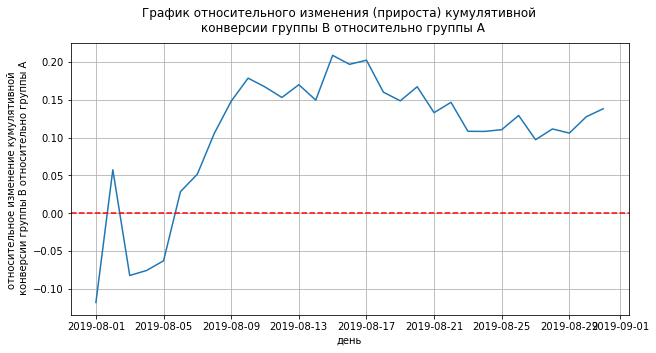

In [204]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/ \
         mergedCumulativeConversions['conversionA']-1)

plt.axhline(y=0, color='red', linestyle='--')

plt.rcParams["figure.figsize"] = (10,5)
plt.suptitle('График относительного изменения (прироста) кумулятивной \n конверсии группы B относительно группы A') 
plt.grid()
plt.xlabel('день')
plt.ylabel('относительное изменение кумулятивной \n конверсии группы B относительно группы A')
plt.show()

<a class='anchor' id='id-section22'/>

### [Вывод](#id-section61)

В начале теста группа B проигрывала группе A, затем вырвалась вперед. Потом ее конверсия опять немного снижалась, но теперь постепенно растет.

Мы полагаем, что отношение конверсии еще не установилось окончательно.

<a class='anchor' id='id-section23'/>

### [Построим точечный график количества заказов по пользователям](#id-section62)

Подсчитаем количество заказов для каждого пользователя из таблицы `orders` методом `groupby()` и `agg()` и сохраним результат в новую таблицу `ordersByUsers`. 

Лишние столбцы удалим методом `drop()` и оставшиеся переименуем.

In [205]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis = 1).groupby('visitorId', as_index = False)\
.agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['userId','orders']

display(ordersByUsers.sort_values(by = 'orders', ascending=False).head(10))

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


- Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем способен сделать обычный пользователь.

Построим точечную диаграмму числа заказов на одного пользователя методом `plt.scatter()`.

Значения по горизонтальной оси запишем в переменную `x_values` — это сгенерированные номера наблюдений (серия из чисел от 0 до количества наблюдений в `ordersByUsers`). 

Значения для вертикальной оси возьмем из столбца `orders` датафрейма `ordersByUsers`.

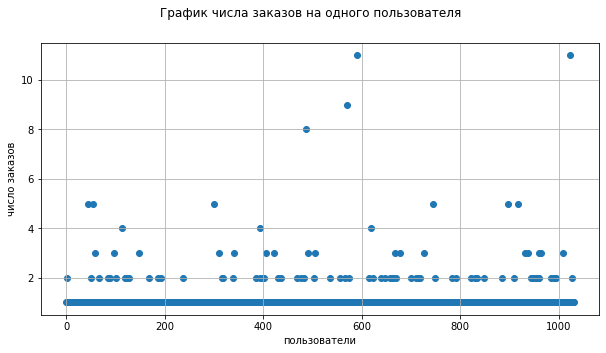

In [206]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])

plt.rcParams["figure.figsize"] = (10,5)
plt.suptitle('График числа заказов на одного пользователя') 
plt.grid()
plt.xlabel('пользователи')
plt.ylabel('число заказов')
plt.show()

<a class='anchor' id='id-section24'/>

### [Вывод](#id-section63)

Максимальное число заказов, которые совершали пользователи, от 5 до 11. Значительно больше, чем способен сделать обычный пользователь.

На графике мы видим много пользователей с 2-4 заказами.

<a class='anchor' id='id-section25'/>

### [Посчитаем 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей](#id-section64)

Посчитаем выборочные перцентили количества заказов на одного пользователя методом `np.percentile()`.

In [207]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([2., 4.])

<a class='anchor' id='id-section26'/>

### [Вывод](#id-section65)

- Не более 5% пользователей оформляли больше 2 заказов. 
- И 1% пользователей заказывали более 4 раз.

Мы выберем 3 заказа на одного пользователя за нижнюю границу числа заказов, и потом отсеим от 1 до 5% аномальных пользователей по ней.

<a class='anchor' id='id-section27'/>

### [Построим точечный график стоимостей заказов](#id-section66)

Используем метод `plt.scatter()`.

Значения по горизонтальной оси запишем в переменную `x_values` — это сгенерированные номера наблюдений (серия из чисел от 0 до количества наблюдений в `orders`). 

Значения для вертикальной оси возьмем из столбца `revenue` датафрейма `orders`.

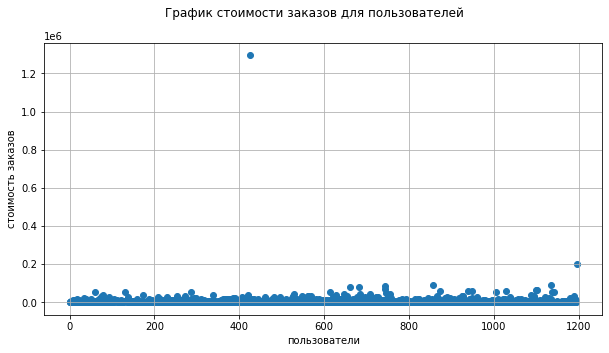

In [208]:
x_values = pd.Series(range(0, len(orders)))

plt.scatter(x_values, orders['revenue'])

plt.rcParams["figure.figsize"] = (16,9)
plt.suptitle('График стоимости заказов для пользователей') 
plt.grid()
plt.xlabel('пользователи')
plt.ylabel('стоимость заказов')
plt.show()

<a class='anchor' id='id-section28'/>

### [Вывод](#id-section67)

График имеет шаг в 200 000 рублей.

Большинство заказов не превышают отметку в 50 000.

Есть немного очень дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 50 000 рублей.

<a class='anchor' id='id-section29'/>

### [Посчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов](#id-section68)

Посчитаем выборочные перцентили стоимости заказов методом `np.percentile()`.

In [209]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

<a class='anchor' id='id-section30'/>

### [Вывод](#id-section69)

- Не более 5% пользователей оформляли заказ дороже 28 000 рублей. 
- И 1% пользователей делали заказ на сумму более 58 000 рублей.

Мы выберем заказы на сумму более 28 000 рублей за нижнюю границу стоимости заказов, и потом отсеим 5% аномальных пользователей по ней.

<a class='anchor' id='id-section31'/>

### [Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным](#id-section70)

По таблице с пользователями `visitors` посчитаем количество пользователей по датам по группам A и В (`visitorsADaily`, `visitorsBDaily`) и накопительное суммарное количество пользователей до каждой даты включительно в группах A и В (`visitorsACummulative`, `visitorsBCummulative`).

In [210]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]\
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

По таблице с заказами `orders` посчитаем количество заказов и выручку по датам по группам A и В (`ordersADaily`, `ordersBDaily`) и накопительное суммарное количество заказов и выручку до каждой даты включительно в группах A и В (`ordersACummulative`, `ordersBCummulative`).

In [211]:
ordersADaily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index = False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis = 1).sort_values(by = ['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']



ordersBDaily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index = False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis = 1).sort_values(by = ['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Объединим все полученные выше таблицы в одну с названием `data` методом `merge()`.

В результате в таблице `data` будут содержаться следующие переменные:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B;
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

In [212]:
data = ordersADaily.merge(ordersBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(ordersBCummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsADaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBDaily, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left')\
    .merge(visitorsBCummulative, left_on = 'date', right_on = 'date', how = 'left')

display(data.head())

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `userId` и `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершенных заказов.

In [213]:
ordersByUsersA = orders[orders['group'] == 'A'].groupby('visitorId', as_index = False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group'] == 'B'].groupby('visitorId', as_index = False)\
.agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

Для подготовки выборки к проверке критерием Манна-Уитни объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

Переменные `sampleA` и `sampleB` должны состоять из двух частей:
1. Список с количеством заказов для каждого из пользователей: `ordersByUsersA['orders']`. 
2. Нули для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и количеством записей о заказах: `data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])`. Создадим объект `pd.Series` нужной длины методом `np.arange()`.

Две последовательности объединим в 1 список методом `pd.concat()` с аргументом `axis = 0` для построчного объединения.

In [214]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum()\
                                            - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum()\
                                            - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0) 

Для поиска статистической значимости различий в конверсии между группами применим **критерий Манна-Уитни**.

**Гипотезу H₀ сформулируем так:** конверсия группы A не отличается от конверсии группы B (различий нет).
**Гипотеза H₁:** конверсия группы A отличается от конверсии группы B (различия есть).

В качестве **уровня статистической значимости** примем общепринятое значение 0.05.

Применим критерий Манна-Уитни методом `stats.mannwhitneyu()` и отформатируем полученное `p-value`, округлив его до 3 знаков после запятой. Сравним его с уровнем статистической значимости 0.05 и примем решение, какую гипотезу принять.

В переменных `sampleA` и `sampleВ` сохранены выборки, где каждый элемент — число заказов определенного пользователя, в том числе 0. Значит, число элементов `sampleA` и `sampleВ` — это количество пользователей, а сумма всех элементов — количество заказов. Чтобы получить конверсию в группах, поделим сумму заказов на число пользователей — применим метод `mean()`. 

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до 3 знаков после запятой.

In [215]:
display("{:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

display("{:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

'0.008'

'0.138'

<a class='anchor' id='id-section32'/>

### [Вывод](#id-section71)

По «сырым» данным различия в конверсии групп A и B есть.

Первое число — `p-value = 0.008` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. **Принимаем альтернативную гипотезу** - конверсия группы A отличается от конверсии группы B.

Относительный прирост группы B по сравнению с группой А равен 13.8% — второе число в выводе.

<a class='anchor' id='id-section33'/>

### [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным](#id-section72)

Для поиска статистической значимости различий в среднем чеке заказа между группами применим **критерий Манна-Уитни**.

**Гипотезу H₀ сформулируем так:** средний чек заказа группы A не отличается от среднего чека заказа группы B (различий нет).
**Гипотеза H₁:** средний чек заказа группы A отличается от среднего чека заказа группы B (различия есть).

В качестве **уровня статистической значимости** примем общепринятое значение 0.05.

Применим критерий Манна-Уитни методом `stats.mannwhitneyu()` и отформатируем полученное `p-value`, округлив его до 3 знаков после запятой. Сравним его с уровнем статистической значимости 0.05 и примем решение, какую гипотезу принять.

Передадим критерию `mannwhitneyu()` данные о выручке с заказов (столбец `revenue` таблицы `orders`) по каждой группе.

Также найдем относительные различия в среднем чеке между группами (для нахождения среднего применим метод `mean()`). Округлим до 3 знаков после запятой.

In [216]:
display("{:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], \
                                            orders[orders['group'] == 'B']['revenue'])[1]))

display("{:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / \
                         orders[orders['group'] == 'A']['revenue'].mean() - 1)) 

'0.365'

'0.259'

<a class='anchor' id='id-section34'/>

### [Вывод](#id-section73)

По «сырым» данным различий в среднем чеке заказа между группами A и B нет.

Первое число — `p-value = 0.365` значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

При этом, средний чек группы B значительно выше среднего чека группы A (26%).

<a class='anchor' id='id-section35'/>

### [Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным](#id-section74)

На предыдущих этапах исследования мы приняли за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы убираем от 1 до 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 3 — `usersWithManyOrders` и пользователей, совершивших заказы дороже 28 000 — `usersWithExpensiveOrders`. Объединим их в таблице `abnormalUsers`.

Узнаем, сколько всего аномальных пользователей, методом `shape`.

In [217]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], \
                                 ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates()\
.sort_values()

display(abnormalUsers.head())
display(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64

(63,)

Узнаем, как действия 63 аномальных пользователей повлияли на результаты теста.

Сначала подготовим очищенные выборки количества заказов по пользователям по группам теста (метод `np.logical_not()`).

In [218]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId']\
                                                           .isin(abnormalUsers))]['orders'],\
                pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),\
                name = 'orders')], axis = 0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId']\
                                                           .isin(abnormalUsers))]['orders'],\
                pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),\
                name = 'orders')], axis = 0) 

Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным, применим **критерий Манна-Уитни**.

**Гипотезу H₀ сформулируем так:** конверсия группы A не отличается от конверсии группы B (различий нет).
**Гипотеза H₁:** конверсия группы A отличается от конверсии группы B (различия есть).

В качестве **уровня статистической значимости** примем значение 0.05.

Применим критерий Манна-Уитни методом `stats.mannwhitneyu()` к полученным выборкам и отформатируем полученное `p-value`, округлив его до 3 знаков после запятой. Сравним его с уровнем статистической значимости 0.05 и примем решение, какую гипотезу принять.

Чтобы получить конверсию в группах, поделим сумму заказов на число пользователей — применим метод `mean()` к полученным выборкам. 

Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до 3 знаков после запятой.

In [219]:
display("{:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

display("{:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1)) 

'0.009'

'0.148'

<a class='anchor' id='id-section36'/>

### [Вывод](#id-section75)

По «очищенным» данным различия в конверсии групп A и B есть.

Первое число — `p-value = 0.009` меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. **Принимаем альтернативную гипотезу** - конверсия группы A отличается от конверсии группы B.

Относительный прирост группы B по сравнению с группой А равен 14.8%.


Таким образом, результаты по конверсии по «сырым» и «очищенным» данным практически не изменились.

<a class='anchor' id='id-section37'/>

### [Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным](#id-section76)

**Гипотезу H₀ сформулируем так:** средний чек заказа группы A не отличается от среднего чека заказа группы B (различий нет).
**Гипотеза H₁:** средний чек заказа группы A отличается от среднего чека заказа группы B (различия есть).

В качестве **уровня статистической значимости** примем значение 0.05.

Применим критерий Манна-Уитни методом `stats.mannwhitneyu()` и отформатируем полученное `p-value`, округлив его до 3 знаков после запятой. Сравним его с уровнем статистической значимости 0.05 и примем решение, какую гипотезу принять.

Передадим критерию `mannwhitneyu()` данные о выручке с заказов (столбец `revenue` таблицы `orders`) по каждой группе.

Также найдем относительные различия в среднем чеке между группами (для нахождения среднего применим метод `mean()`). Округлим до 3 знаков после запятой.

In [220]:
display("{:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

display("{:.3f}".format(
    orders[np.logical_and(
        orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 


'0.488'

'-0.017'

<a class='anchor' id='id-section38'/>

### [Вывод](#id-section77)

По «очищенным» данным различий в среднем чеке заказа между группами A и B нет.

`p-value = 0.488` значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.

При этом, средний чек группы B практически равен среднему чеку группы A (разница составляет лишь -0.01%).

Таким образом, по сравнению с «сырыми» данными, p-value увеличился, но разница между сегментами сократилась с 26% практически до 0%.

<a class='anchor' id='id-section39'/>

## [Шаг 5. Общий вывод](#id-section78)

На этапе приоритизации гипотез мы пришли к выводу о том, что параметры для формул ICE и RICE были оценены точно, так как разные методики показали похожий рейтинг для гипотез (если разделить их на 2 общие группы: самых высоко и низко оцененных). 

Но если всматриваться на место каждой отдельной гипотезы в рейтинге, то всплывают **различия в оценках по ICE и RICE**.

**Согласно фреймворку ICE, самыми приоритетными гипотезами являются**:
1. запуск акции на скидку на товар в день рождения,
2. добавление 2 новых каналов привлечения трафика,
3. добавление формы подписки на все основные страницы,
4. показ на главной странице баннеров с акциями.

**Согласно фреймворку RICE, самые приоритетные гипотезы**:
1. добавление формы подписки на все основные страницы (по ICE на 3 месте),
2. добавление блоков рекомендаций товаров на сайт (по ICE на 5 месте), 
3. показ на главной странице баннеров с акциями (по ICE на 4 месте),
4. добавление 2 новых каналов привлечения трафика (по ICE на 2 месте).

Отдельно отметим, что гипотеза о запуске акции на скидку на товар в день рождения опустилась с 1 места (по ICE) на 5 место (по RICE). 

**Самые низкооцененные гипотезы и по ICE, и по RICE** одни и те же:
- изменение цвета фона главной страницы,
- добавление страницы отзывов от клиентов,
- запуск службы доставки,
- изменение структуры категорий товаров.

Таким образом, при расчете RICE оказалось, что гипотезы, у которых параметр **reach больше**, чем у остальных (то есть изменение, которое мы хотим внести, затронет большое количество пользователей), обгоняют остальные гипотезы. По этой причине гипотеза о запуске акции на скидку на товар в день рождения опустилась в рейтинге.

Следовательно, при оценке по фреймворку RICE кроме силы гипотезы (impact) **наибольшее влияние** имеет то, сколько пользователей затронет изменение (**reach**).

---
По итогам **исследования результатов А/В-теста** нам удалось установить следующее:

- Есть статистически значимое различие по конверсии между группами как по «сырым» данным, так и после фильтрации аномалий.

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Однако после удаления аномалий разница между сегментами сократилась с 26% практически до 0%.

- График различия конверсии между группами показывает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

- График различия среднего чека колеблется: это указало нам на то, что в данных присутствуют аномалии и выбросы. Сделать из этого графика определенный вывод нельзя.

Мы предлагаем остановить тест, зафиксировать победу группы В - по конверсии в покупки она статистически значимо лучше группы А (хотя по среднему чеку не отличилась от группы А), а график конверсии говорит о фиксации результата. 